In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Springboard/miniProjects/UltimateChallenge

Mounted at /content/drive
/content/drive/My Drive/Springboard/miniProjects/UltimateChallenge


In [5]:
#Import data, create Count and day of week columns, set index to login_time column
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins['count'] = 1
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.set_index('login_time', inplace=True)

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [ ]:
#resample to 15min, hourly, & daily intervals
logins_15m = logins.resample('15T').sum()
logins_hourly = logins.resample('H').sum()
logins_daily = logins.resample('D').sum()

In [ ]:
#Create Column for day of week
logins_15m['day_of_week'] = logins_15m.index.day_name()
logins_hourly['day_of_week'] = logins_hourly.index.day_name()
logins_daily['day_of_week'] = logins_daily.index.day_name()

In [ ]:
logins_hourly['hour_of_day'] = logins_hourly.index.hour
logins_daily['day_of_month'] = logins_daily.index.day

In [ ]:
#Taking a peek at the data
print("Start Date: ", logins_15m.index.min())
print("End Date: ", logins_15m.index.max())
print("# of Resampled Entries: ", logins_15m.shape[0])
print("Date Range: ", logins_15m.index.max()-logins.index.min())

print(logins_15m.head())
print(logins_hourly.head())
print(logins_daily.head())

Start Date:  1970-01-01 20:00:00
End Date:  1970-04-13 18:45:00
# of Resampled Entries:  9788
Date Range:  101 days 22:32:44
                     count day_of_week
login_time                            
1970-01-01 20:00:00      2    Thursday
1970-01-01 20:15:00      6    Thursday
1970-01-01 20:30:00      9    Thursday
1970-01-01 20:45:00      7    Thursday
1970-01-01 21:00:00      1    Thursday
                     count day_of_week  hour_of_day
login_time                                         
1970-01-01 20:00:00     24    Thursday           20
1970-01-01 21:00:00      9    Thursday           21
1970-01-01 22:00:00     21    Thursday           22
1970-01-01 23:00:00     58    Thursday           23
1970-01-02 00:00:00     53      Friday            0
            count day_of_week  day_of_month
login_time                                 
1970-01-01    112    Thursday             1
1970-01-02    681      Friday             2
1970-01-03    793    Saturday             3
1970-01-04    788 

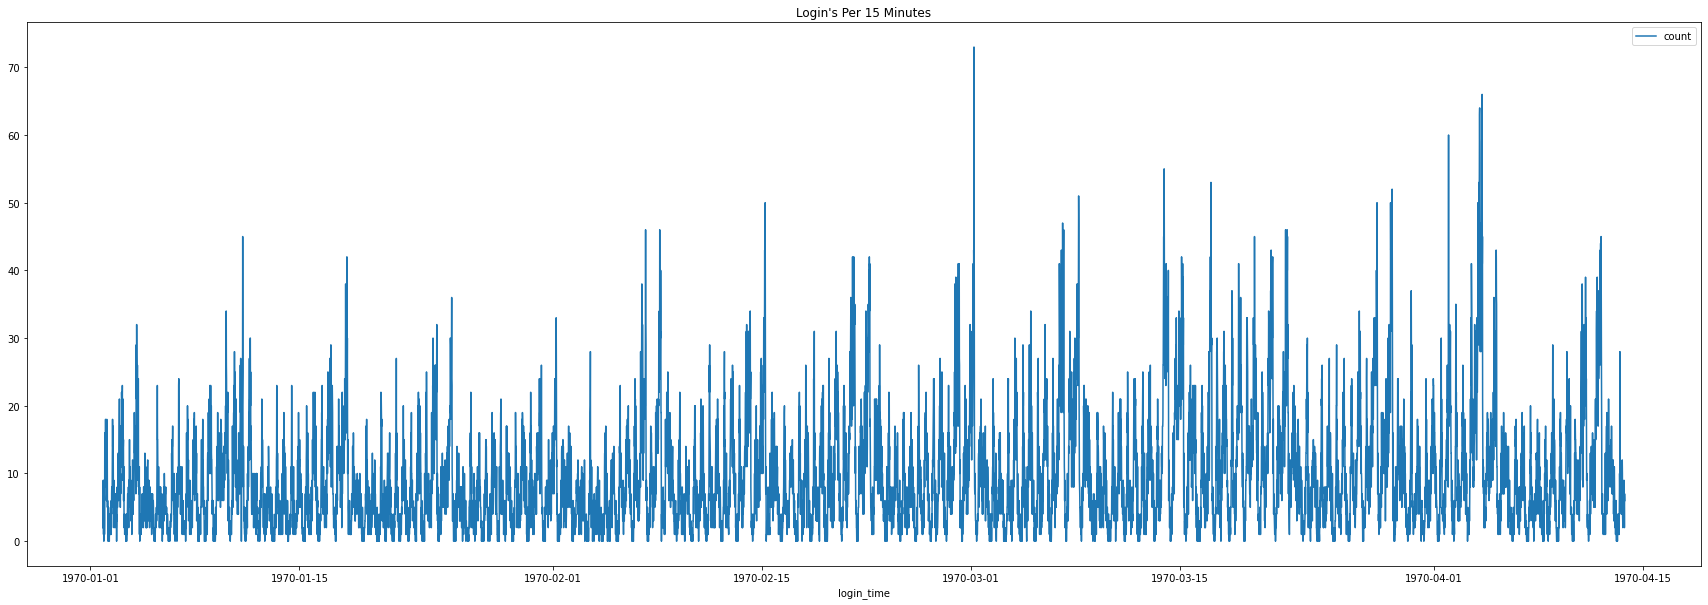

In [ ]:
plt.subplots(figsize=(30,10))
sns.lineplot(data=logins_15m)
plt.title("Login's Per 15 Minutes")
plt.show()

Plot of Total Login Counts per 15min intervals over the entire dataset.  There are definately some patterns but the resolution is too fine to tell.  Let's look for patterns.

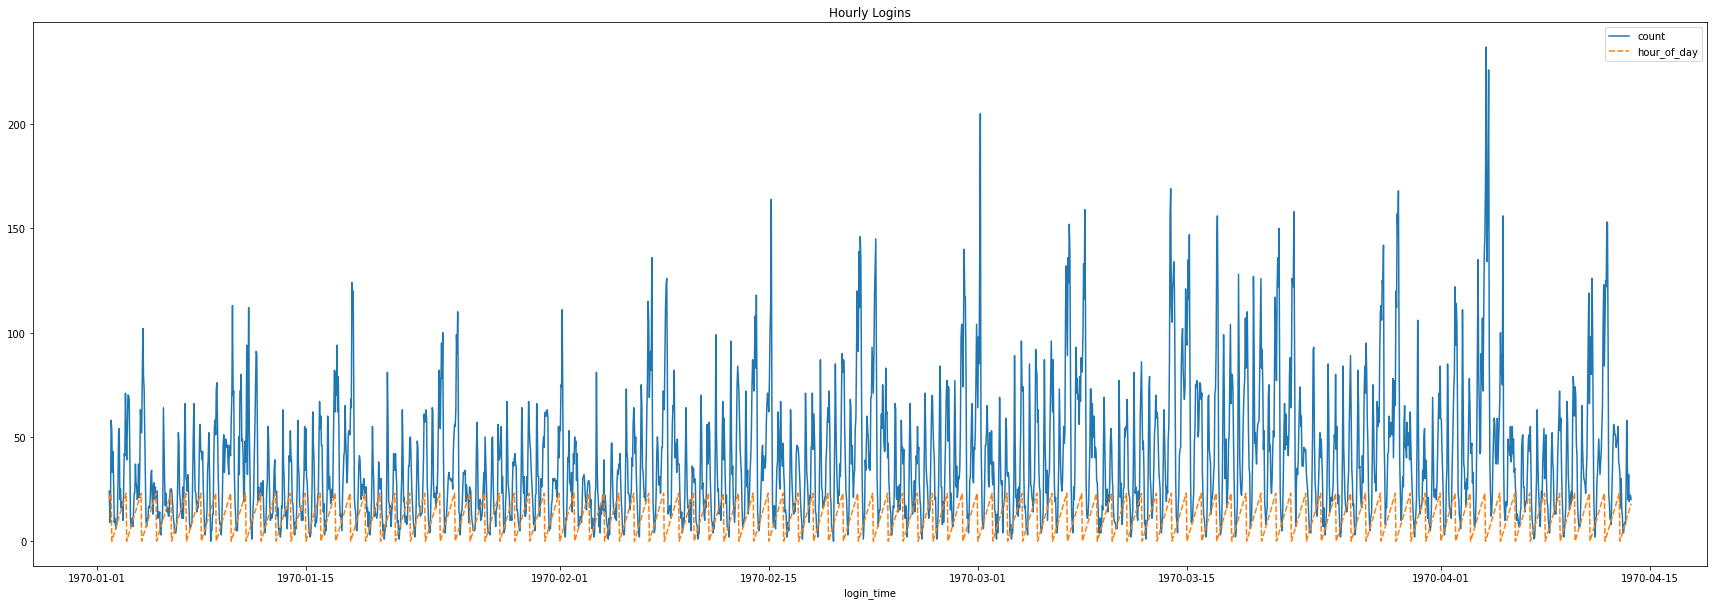

In [ ]:
plt.subplots(figsize=(30,10))
sns.lineplot(data=logins_hourly)
plt.title('Hourly Logins')
plt.show()

The Patterns are easier to see, it looks like there are daily patterns but weekly patterns may exist as well, I 
don't notice anything monthly

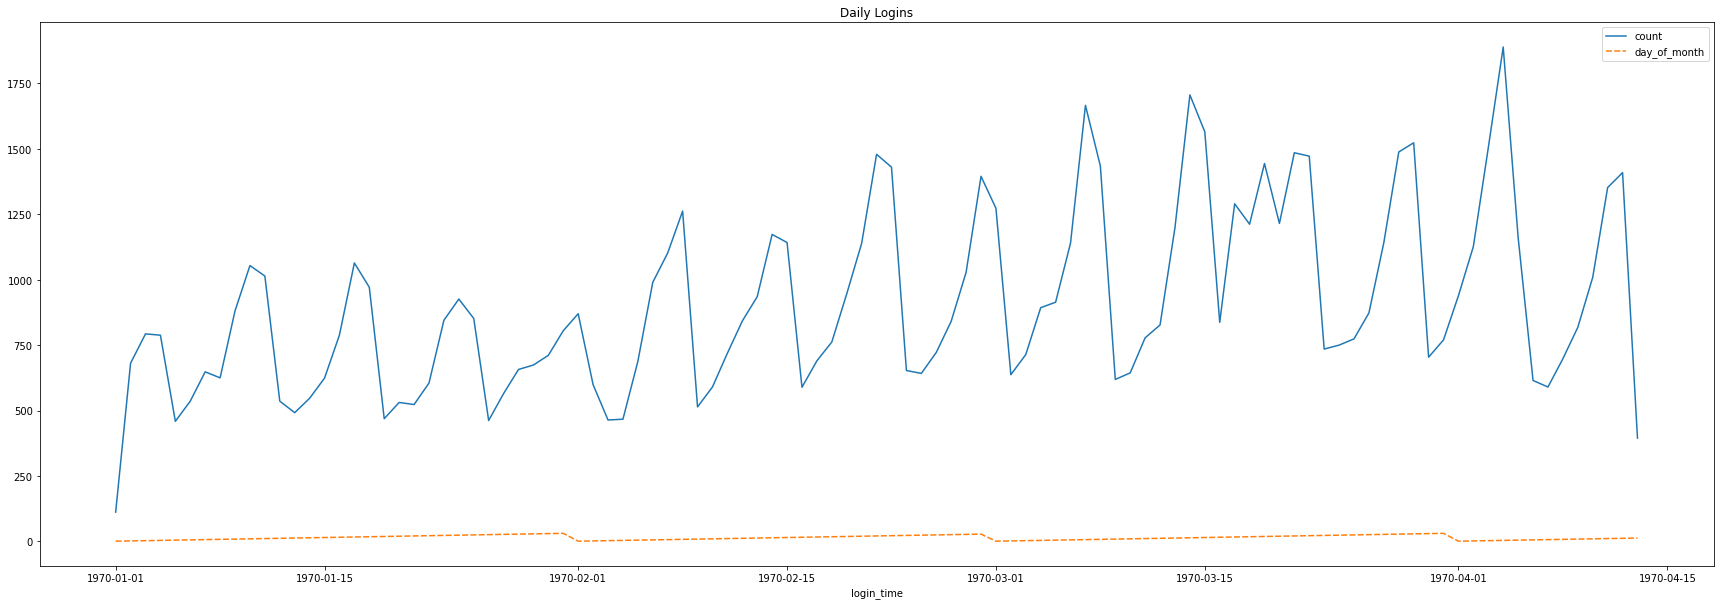

In [ ]:
plt.subplots(figsize=(30,10))
sns.lineplot(data=logins_daily)
plt.title('Daily Logins')
plt.show()

There is definately a weekly pattern as we get about 5 cycles per month.  The dataset is too small to discern a yearly or monthly pattern.  we'll focus on Daily and Weekly patterns.

In [ ]:
#Code to properly order Days of week
from pandas.core.dtypes.dtypes import CategoricalDtype
days_of_week = CategoricalDtype(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
logins_15m['day_of_week'] = logins_15m['day_of_week'].astype(days_of_week)

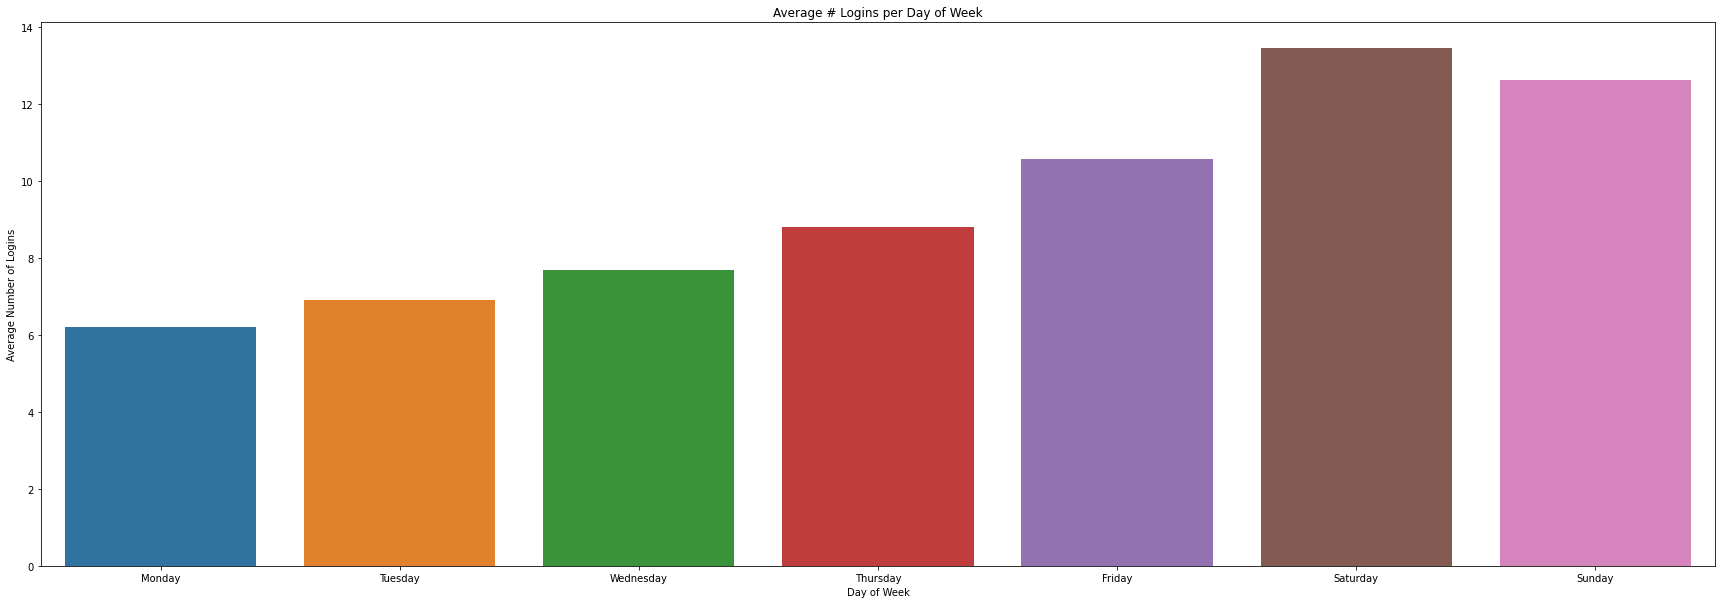

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(data=logins_15m.groupby('day_of_week').mean().sort_values('day_of_week'), x=logins_15m.groupby('day_of_week').mean().sort_values('day_of_week').index, y='count')
plt.title('Average # Logins per Day of Week')
plt.xlabel("Day of Week")
plt.ylabel("Average Number of Logins")
plt.show()

Friday, Saturday and Sunday, the weekends, appear to be the busiest days of the week.  There is also a slowly increasing trend from the Start of the week Monday, peaking Saturday.

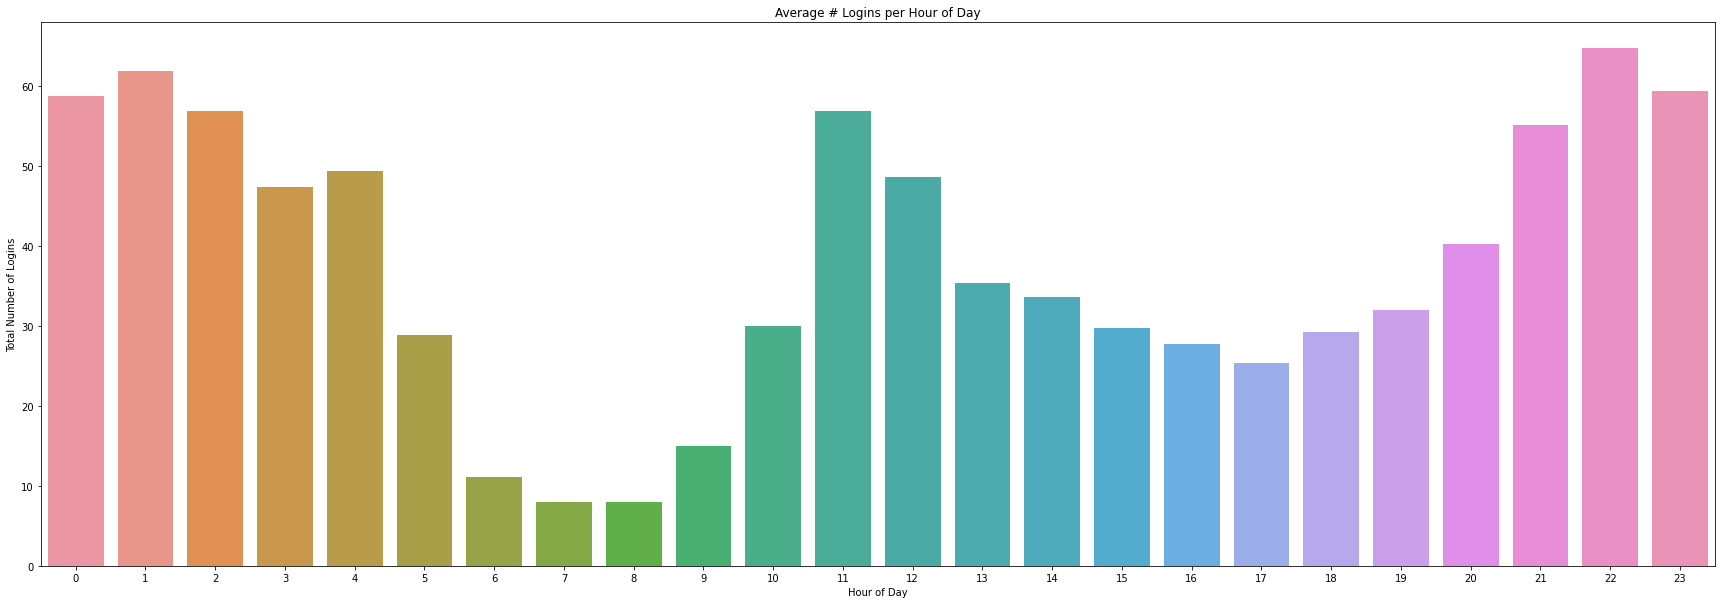

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(data=logins_hourly.groupby('hour_of_day').mean(), x=logins_hourly.groupby('hour_of_day').mean().index, y='count')
plt.title('Average # Logins per Hour of Day')
plt.xlabel("Hour of Day")
plt.ylabel("Total Number of Logins")
plt.show()

There appears to be a regular cycle of increased logins around noon, lunchtime, decreasing then increasing in the evening peaking around 10pm then decreasing until lunch the next day.

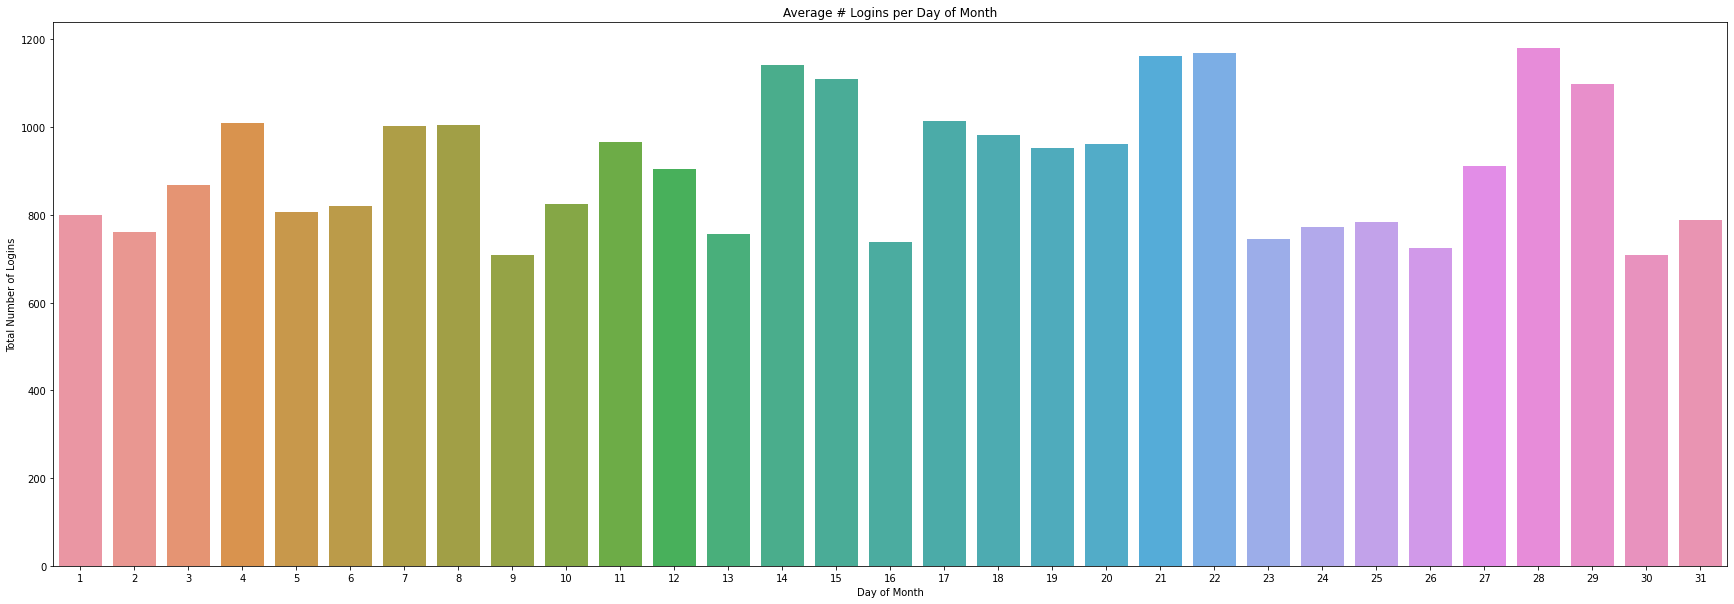

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(data=logins_daily.groupby('day_of_month').mean(), x=logins_daily.groupby('day_of_month').mean().index, y='count')
plt.title('Average # Logins per Day of Month')
plt.xlabel("Day of Month")
plt.ylabel("Total Number of Logins")
plt.show()

Over the days of the Month there don't appear to be any strong patterns besides logins peaking on the weekends.  It does appear that as the month goes on Login's slightly increase but it isn't a strong trend